### Transformations - Translations & Rotations


In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-06-05 04:04:50--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.162
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.9MB/s    in 1.4s    

2022-06-05 04:04:52 (19.9 MB/s) - ‘images.zip’ saved [29586716/29586716]



#### 1. Translations
This is a simple affine translation which shifts the image right/left. It doesn't change the aspect ratio of the image.

cv2.wrapAffine(image, T, (width, height))

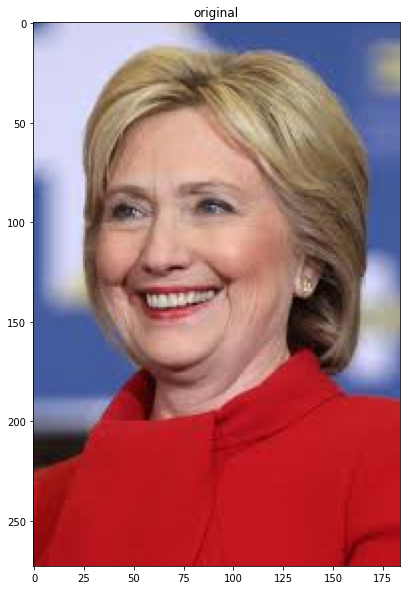

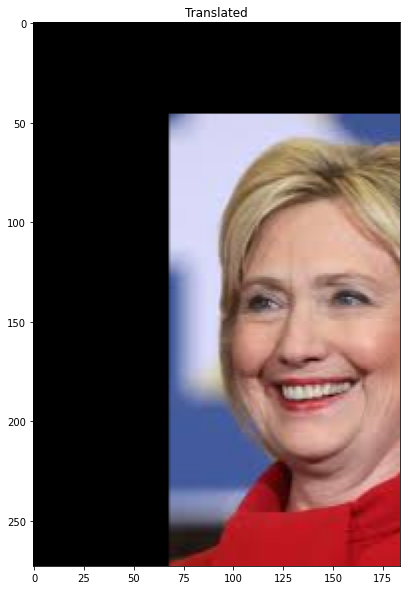

In [5]:
image = cv2.imread('/content/images/Hillary.jpg')
imshow("original", image)
height, width = image.shape[:2]

# we shift it by the quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# our Translation
#       | 1 0 Tx |
#   T = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1,0,quarter_height], [0, 1, quarter_width]])

translated = cv2.warpAffine(image, T, (width, height))

imshow("Translated", translated)

### Rotations

cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle_of_ratation, scale)

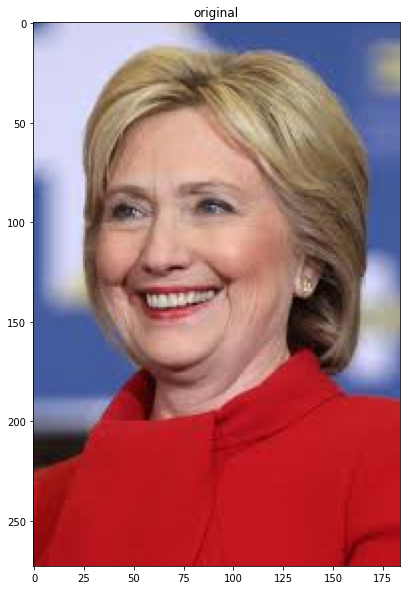

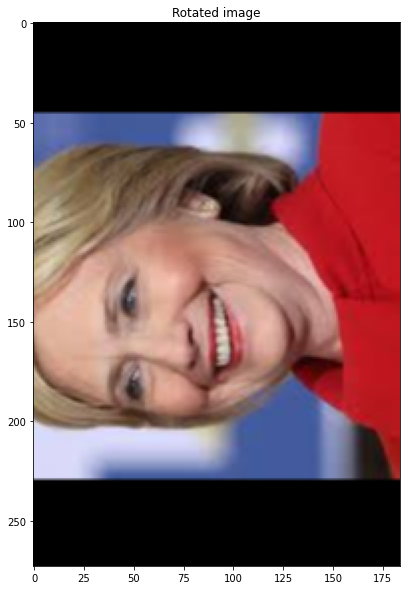

In [8]:
image = cv2.imread('/content/images/Hillary.jpg')
imshow("original", image)

height, width = image.shape[:2]

# Divide by two to get the rotation around its center
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90,1)

rotated_img = cv2.warpAffine(image, rotation_matrix, (width, height))

imshow("Rotated image", rotated_img)

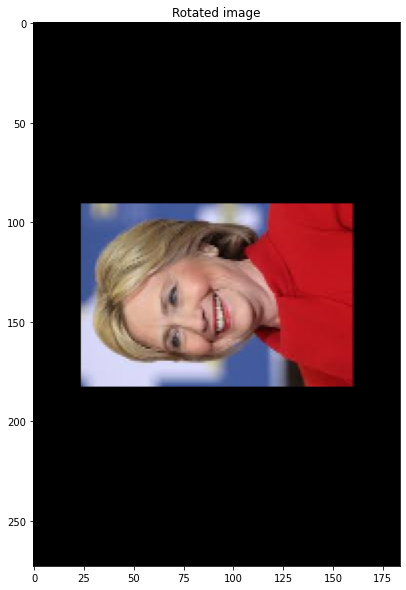

In [9]:
# Divide by two to get the rotation around its center
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90,0.5)

rotated_img = cv2.warpAffine(image, rotation_matrix, (width, height))

imshow("Rotated image", rotated_img)

### Rotation with cv2.transpose (less flexible)

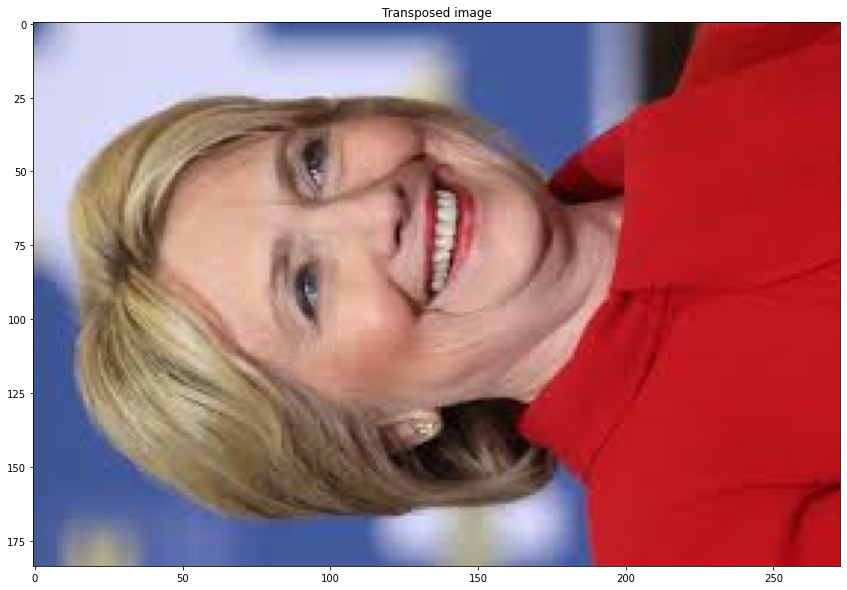

In [11]:
rotated_img = cv2.transpose(image)

imshow("Transposed image", rotated_img)

### Flip

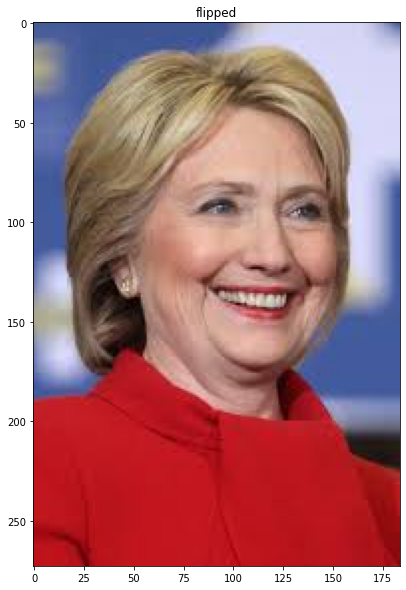

In [12]:
flipped = cv2.flip(image, 1)

imshow("flipped", flipped)